# Problem
This circuit has the following data. And we must find the unknown:
**i1; i2; i3; i4; i5**
### To solve this problem, you need to use graphs!

<img src="1.png" />

# Solution

In [1]:
import networkx as nx

In [2]:
R1 = 3; R2 = 4; R3 = 5; R4= 2; R5 = 6;
V1 = 2; V2 = 2;


Shortest path for V1+ =  ['V1+', 'E', 'R1', 'A', 'R2', 'D', 'K', 'V1-']
Longest path for V1+ =  ['V1+', 'E', 'R1', 'A', 'R3', 'B', 'R4', 'C', 'D', 'K', 'V1-']
Shortest path for V2+ =  ['V2+', 'F', 'R5', 'B', 'R4', 'C', 'L', 'V2-']

Result:
I1 =  0.2857142857142857
I2 =  0.2
I4 =  0.25

I3 =  0.08571428571428569
I5 =  0.45

The algebraic sum of all currents in the node is zero:
I1 - I2 - I3 =  0.0
I2 + I4 - I5 =  0.0


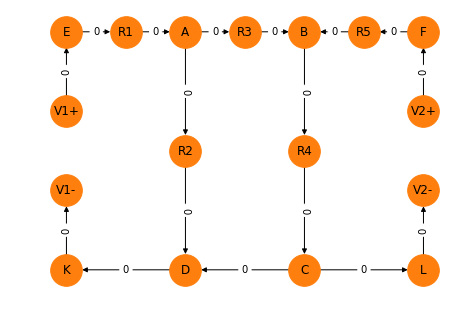

In [4]:
positions = {'V1+' :(5,1), 'V1-':(5,-1), 'E' :(5,3), 'R1':(10, 3), 'A' :(15,3), 'R3' :(20,3),  'B' :(25,3), 'R5':(30, 3),  'F' :(35,3),             
             'R4':(25,0), 'D' :(15,-3), 'R2':(15,0),
             'L' :(35,-3), 'C':(25,-3),  'K' :(5,-3), 
             'V2+':(35,1),  'V2-':(35,-1)}


node_links = {('V1+', 'E'): 0, ('K', 'V1-'): 0,
              
              ('E', 'R1'): 0, ('R1', 'A'): 0,  ('A', 'R3'): 0, ('R3', 'B'): 0, ( 'F','R5'): 0, ( 'R5','B'): 0, 
              
              ('A', 'R2'): 0, ('R2', 'D'): 0, ('B','R4'): 0, ('R4','C'): 0,   
              
              ('C', 'L'): 0, ('D', 'K'): 0, ('C', 'D'): 0,
              
              ('V2+', 'F',): 0,  ('L','V2-'): 0,}



G2 = nx.DiGraph();G2.add_nodes_from(positions); G2.add_edges_from(node_links); 

G2.nodes['V1+']['vol'] = V1
G2.nodes['V2+']['vol'] = V2
G2.nodes['R1']['res'] = R1
G2.nodes['R2']['res'] = R2
G2.nodes['R3']['res'] = R3
G2.nodes['R4']['res'] = R4
G2.nodes['R5']['res'] = R5

nx.draw(G2, positions, node_color = 'C1', node_shape = 'o', node_size = 1000, with_labels = True)
nx.draw_networkx_edge_labels(G2, positions, edge_labels = node_links);

cycle1 = []; cycle2 = []; cycle3 = []


cycle1.extend(nx.bidirectional_shortest_path(G2, 'V1+', 'V1-'))
cycle2.extend(nx.dag_longest_path(G2, weight='weight'))
cycle3.extend(nx.shortest_path(G2, 'V2+', 'V2-'))

print('Shortest path for V1+ = ', cycle1)
print('Longest path for V1+ = ', cycle2)
print('Shortest path for V2+ = ', cycle3)
print()

def calcOhmsLaw(n):
    res = nx.get_node_attributes(G2,'res')
    vol = nx.get_node_attributes(G2,'vol')
    resList = []
    getRes = []
    volList = []
    getVol = []
    
    for i in n:
        resList.append(res.get(i))
        volList.append(vol.get(i))

    for i in resList:
        if i is not None:
             getRes.append(i)

    for i in volList:
        if i is not None:
             getVol.append(i)
                
    result = sum(getVol) / sum(getRes)
    
    return result
    
I1 = calcOhmsLaw(cycle1)
I2 = calcOhmsLaw(cycle2)
I4 = calcOhmsLaw(cycle3)
I3 = I1 - I2
I5 = I4 + I2

a = I1 - I2 - I3
b = I2 + I4 - I5

print('Result:')
print('I1 = ', I1); print('I2 = ', I2); print('I4 = ', I4)
print()
print('I3 = ', I3); print('I5 = ', I5)
print()

print('The algebraic sum of all currents in the node is zero:')
print('I1 - I2 - I3 = ', a)
print('I2 + I4 - I5 = ', b)

# Result

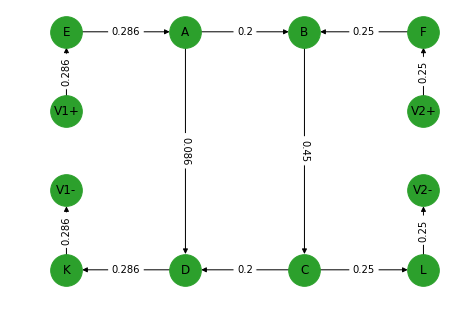

In [5]:
positions = {'V1+' :(5,1), 'V1-':(5,-1), 'E' :(5,3),  'A' :(15,3),  'B' :(25,3),  'F' :(35,3),             
              'D' :(15,-3),
             'L' :(35,-3), 'C':(25,-3),  'K' :(5,-3), 
             'V2+':(35,1),  'V2-':(35,-1)}

node_links = {('V1+', 'E'): round(I1,3), ('K', 'V1-'): round(I1,3),
              
              ('E', 'A'): round(I1,3), ('A', 'B'): round(I2,3), ( 'F','B'): round(I4,3), 
              
              ('A', 'D'): round(I3,3), ('B','C'): round(I5,3),   
              
              ('C', 'L'): round(I4,3), ('D', 'K'): round(I1,3), ('C', 'D'): round(I2,3),
              
              ('V2+', 'F',): round(I4,3),  ('L','V2-'): round(I4,3),}



G1 = nx.DiGraph();G1.add_nodes_from(positions); G1.add_edges_from(node_links); 
nx.draw(G1, positions, node_color = 'C2', node_shape = 'o', node_size = 1000, with_labels = True)
nx.draw_networkx_edge_labels(G1, positions, edge_labels = node_links);

# Prepared by: Viktor Surzhko